# WSCC 9-bus System Tests

## Monolithic Simulation

In [15]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *

### Read log files and list all column names

In [16]:
path_orig = '../dpsim/Logs/'
logName_orig = 'WSCC-9bus_LeftVector'
logFilename_orig = path_orig + logName_orig + '.csv'
print(logFilename_orig)

ts_dpsim_orig = read_timeseries_dpsim(logFilename_orig)

../dpsim/Logs/WSCC-9bus_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000', 'node00001', 'node00002', 'node00003', 'node00004', 'node00005', 'node00006', 'node00007', 'node00008', 'node00009', 'node00010', 'node00011', 'node00012', 'node00013', 'node00014', 'node00015', 'node00016', 'node00017', 'node00018', 'node00019', 'node00020', 'node00021', 'node00022', 'node00023']
DPsim results variable number: 24
DPsim results length: 1000


### Phasors at first time step

In [17]:
phasors_orig = get_node_voltage_phasors(ts_dpsim_orig)
for node, phasor in phasors_orig.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 18449.99552327233<9.684590296261968
node00001: 229395.00269874255<3.9604469587125277
node00002: 225198.4526737915<0.819821467487452
node00003: 218642.19223228647<-4.1525866964316895
node00004: 17160.0<-0.0
node00005: 230945.74324995282<2.090082707174437
node00006: 222218.63887500527<-3.7474434170536766
node00007: 229009.63678605887<-2.3232329203220035
node00008: 14145.002833538387<4.867982745992806
node00009: 9305.130983555524<171.53961867547466
node00010: 6607.440262217284<160.4765212379745
node00011: 219638.0276742404<-4.436908286070751
node00012: 223467.36906720765<-4.007028084718213
node00013: 223006.65695303807<4.294935864672019
node00014: 225515.9473457084<2.3499186338344447
node00015: 227896.36553209095<4.050576316491891
node00016: 225873.72245705724<0.6695515682511094
node00017: 6358.05931343936<131.71187681855903
node00018: 235750.03182134865<9.684588658515398
node00019: 728.2277008338875<-8.460384442512206
node00020: 239200.0<0.0
node00021: 456.1216538792803<-48.28

### Phasors at last time step

In [18]:
for node, phasor in phasors_orig.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

node00000: 18449.99552327233<9.684590296261968
node00001: 229395.9033122268<3.9604413997366423
node00002: 225198.4526880996<0.8198217218849122
node00003: 218642.19223228647<-4.1525866964316895
node00004: 17160.0<-0.0
node00005: 230946.24324555034<2.0900804144736282
node00006: 222218.63952859154<-3.747445989892397
node00007: 229012.33419012427<-2.3120671366205596
node00008: 14145.002833538387<4.867982745992806
node00009: 9305.130983555524<171.53961867547466
node00010: 6607.440262217284<160.4765212379745
node00011: 219638.0276742404<-4.436908286070751
node00012: 223467.36976599626<-4.007030642394497
node00013: 223007.45845097312<4.294933281853421
node00014: 225516.44729425522<2.349915709872242
node00015: 227897.26681581966<4.050572872616439
node00016: 225873.72245705724<0.6695515682511094
node00017: 6358.060059939667<131.7118708224284
node00018: 235750.03182134865<9.684588658515398
node00019: 728.2277008338875<-8.460384442512206
node00020: 239200.0<0.0
node00021: 456.1216619908005<-48.28

### Phasors at last time step in per unit

In [19]:
nominal_voltages_orig = {'node00000': 18000, 'node00001': 230000, 'node00002': 230000, 
                         'node00003': 230000, 'node00004': 16500, 'node00005': 230000, 
                         'node00006': 230000, 'node00007': 230000, 'node00008': 13800}
for node, nom_voltage in nominal_voltages_orig.items():
    print(node + ': ' + str(phasors_orig[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors_orig[node]['phase'].values[0]))

node00000: 1.0249997512929072<9.684590296261968
node00001: 0.9973695769510545<3.9604469587125277
node00002: 0.9791237072773543<0.819821467487452
node00003: 0.9506182270968977<-4.1525866964316895
node00004: 1.04<-0.0
node00005: 1.004111927173708<2.090082707174437
node00006: 0.9661679951087185<-3.7474434170536766
node00007: 0.9956940729828646<-2.3232329203220035
node00008: 1.0250002053288687<4.867982745992806


### Plot node phase
The phase at node 8 is not initialized properly since the CIM load flow data is not accurate. Therefore, the steady-state initialization implemented in the MNA solver is executed first so that the initial phase at t=0 is already very close to the correct one.
Using PI-lines with parallel impedances to ground not only during the initialization but also the simulation or more accurate CIM load flow results would probably further improve the results because the values around n8 have still not converged completely.

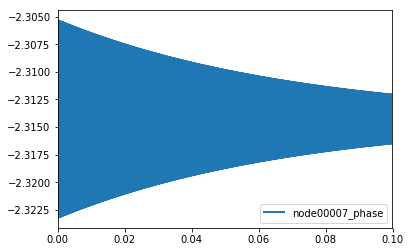

In [20]:
plot_timeseries(1, phasors_orig['node00007']['phase'])

### Plot node voltages

(200000, 240000)

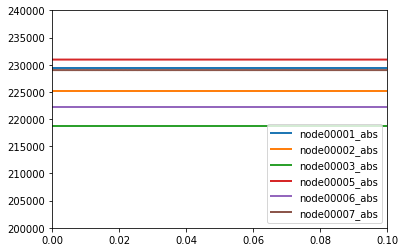

In [21]:
plot_timeseries(2, phasors_orig['node00001']['abs'])
plot_timeseries(2, phasors_orig['node00002']['abs'])
plot_timeseries(2, phasors_orig['node00003']['abs'])
plot_timeseries(2, phasors_orig['node00005']['abs'])
plot_timeseries(2, phasors_orig['node00006']['abs'])
plot_timeseries(2, phasors_orig['node00007']['abs'])
plt.gca().axes.set_ylim([200000,240000])

The results for n2 are very good.

(229300, 229500)

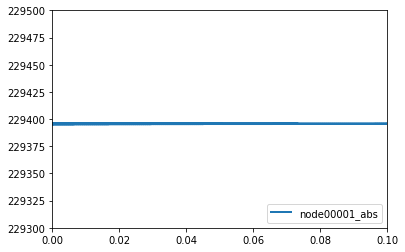

In [22]:
plot_timeseries(2, phasors_orig['node00001']['abs'])
plt.gca().axes.set_ylim([229300,229500])

## Shmem Simulation

In [90]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *

### Read log files and list all column names

In [102]:
path_shmem = 'D:/mmi/git/Simulation/dpsim/build/Logs/'
logName_shmem = 'Shmem_WSCC-9bus_LeftVector'
logFilename_shmem = path_shmem + logName_shmem + '.csv'
print(logFilename_shmem)

ts_dpsim_shmem = read_timeseries_dpsim_cmpl(logFilename_shmem)

D:/mmi/git/Simulation/dpsim/build/Logs/Shmem_WSCC-9bus_LeftVector.csv
DPsim results column names: ['NodeRe0000', 'NodeRe0001', 'NodeRe0002', 'NodeRe0003', 'NodeRe0004', 'NodeRe0005', 'NodeRe0006', 'NodeRe0007', 'NodeRe0008', 'NodeRe0009', 'NodeRe0010', 'NodeRe0011', 'NodeRe0012', 'NodeRe0013', 'NodeRe0014', 'NodeRe0015', 'NodeRe0016', 'NodeRe0017', 'NodeRe0018', 'NodeRe0019', 'NodeRe0020', 'NodeRe0021', 'NodeRe0022', 'NodeRe0023', 'NodeIm0000', 'NodeIm0001', 'NodeIm0002', 'NodeIm0003', 'NodeIm0004', 'NodeIm0005', 'NodeIm0006', 'NodeIm0007', 'NodeIm0008', 'NodeIm0009', 'NodeIm0010', 'NodeIm0011', 'NodeIm0012', 'NodeIm0013', 'NodeIm0014', 'NodeIm0015', 'NodeIm0016', 'NodeIm0017', 'NodeIm0018', 'NodeIm0019', 'NodeIm0020', 'NodeIm0021', 'NodeIm0022', 'NodeIm0023']
DPsim results number: 24


### Phasors at first time step

In [103]:
phasors_shmem = get_node_voltage_phasors(ts_dpsim_shmem)
for node, phasor in phasors_shmem.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

n1: 18449.99552327233<9.684590296261968
n2: 229466.25091261242<3.9578362063966774
n3: 225324.38938170258<0.8166843551677997
n4: 218763.14396392298<-4.15777078609994
n5: 17160.0<-0.0
n6: 231218.5230502228<2.0873517605318397
n7: 222397.98623088948<-3.7528156554664744
n8: 229475.20638715234<-2.327460074910602
n9: 14145.002833538387<4.867982745992806
n10: 9306.740314197717<171.53878945909545
n11: 6611.252815575879<160.48315193927397
n12: 219759.69751398548<-4.441978199922051
n13: 223648.23073561504<-4.01222901172353
n14: 223074.76585355506<4.292251816593157
n15: 225785.29042843002<2.3469248485719616
n16: 227966.79921255662<4.047934429269616
n17: 226000.1897331193<0.6664777101234622
n18: 6363.736702928084<131.74929284168925
n19: 235750.03182134865<9.684588658515398
n20: 728.353515418749<-8.461210719831175
n21: 239200.0<0.0
n22: 456.5288826572203<-48.25070870780739
n23: 235749.98051658118<4.867983313733503
n24: 396.67513672032686<-19.51684358018809


### Phasors at last time step

In [104]:
for node, phasor in phasors_shmem.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

n1: 18449.99552327233<9.684590296261968
n2: 229394.48782463823<3.9614823696077868
n3: 225198.48851518126<0.8204584786260875
n4: 218641.5758996893<-4.152895322669745
n5: 17160.0<-0.0
n6: 230919.9346294488<2.090140870226542
n7: 222218.1983392728<-3.748076156327938
n8: 228998.09255743885<-2.314979995433578
n9: 14145.002833538387<4.867982745992806
n10: 9303.54719647189<171.53809314678165
n11: 6607.291947773006<160.4757891853069
n12: 219637.1211873405<-4.437232765093572
n13: 223466.64248448383<-4.0076708423873075
n14: 223005.06188932125<4.295997240822129
n15: 225489.5393283103<2.350006571314965
n16: 227895.65556010517<4.051614767738431
n17: 225873.55151145929<0.670182217147173
n18: 6359.513284650092<131.72268604849967
n19: 235750.03182134865<9.684588658515398
n20: 728.1036992170071<-8.461907479699407
n21: 239200.0<0.0
n22: 456.2260099943886<-48.2773206963929
n23: 235749.98051658118<4.867983313733503
n24: 396.43749681407536<-19.524202641708534


### Phasors at last time step in per unit

In [105]:
nominal_voltages_shmem = {'n1': 18000, 'n2': 230000, 'n3': 230000, 'n4': 230000, 'n5': 16500, 'n6': 230000, 'n7': 230000, 'n8': 230000, 'n9': 13800}
for node, nom_voltage in nominal_voltages_shmem.items():
    print(node + ': ' + str(phasors_shmem[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors_shmem[node]['phase'].values[0]))

n1: 1.0249997512929072<9.684590296261968
n2: 0.997679351793967<3.9578362063966774
n3: 0.9796712581813156<0.8166843551677997
n4: 0.9511441041909695<-4.15777078609994
n5: 1.04<-0.0
n6: 1.0052979263053166<2.0873517605318397
n7: 0.9669477662212587<-3.7528156554664744
n8: 0.9977182886397928<-2.327460074910602
n9: 1.0250002053288687<4.867982745992806


### Plot node voltages

(200000, 240000)

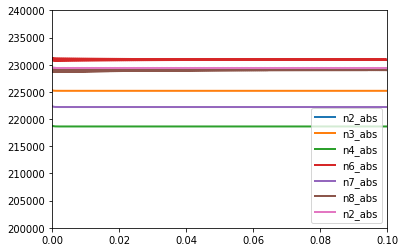

In [106]:
plot_timeseries(2, phasors_shmem['n2']['abs'])
plot_timeseries(2, phasors_shmem['n3']['abs'])
plot_timeseries(2, phasors_shmem['n4']['abs'])
plot_timeseries(2, phasors_shmem['n6']['abs'])
plot_timeseries(2, phasors_shmem['n7']['abs'])
plot_timeseries(2, phasors_shmem['n8']['abs'])
plot_timeseries(2, phasors_shmem['n2']['abs'])
plt.gca().axes.set_ylim([200000,240000])

## Shmem Controlled Load Simulation

In [179]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *

### Read log files and list all column names

In [180]:
path_ctrl = 'D:/mmi/git/Simulation/dpsim/build/Logs/'
logName_ctrl = 'Shmem_WSCC-9bus_Ctrl_LeftVector'
logFilename_ctrl = path_ctrl + logName_ctrl + '.csv'
print(logFilename_ctrl)

ts_dpsim_ctrl = read_timeseries_dpsim_cmpl(logFilename_ctrl)

D:/mmi/git/Simulation/dpsim/build/Logs/Shmem_WSCC-9bus_Ctrl_LeftVector.csv
DPsim results column names: ['NodeRe0000', 'NodeRe0001', 'NodeRe0002', 'NodeRe0003', 'NodeRe0004', 'NodeRe0005', 'NodeRe0006', 'NodeRe0007', 'NodeRe0008', 'NodeRe0009', 'NodeRe0010', 'NodeRe0011', 'NodeRe0012', 'NodeRe0013', 'NodeRe0014', 'NodeRe0015', 'NodeRe0016', 'NodeRe0017', 'NodeRe0018', 'NodeRe0019', 'NodeRe0020', 'NodeRe0021', 'NodeRe0022', 'NodeRe0023', 'NodeIm0000', 'NodeIm0001', 'NodeIm0002', 'NodeIm0003', 'NodeIm0004', 'NodeIm0005', 'NodeIm0006', 'NodeIm0007', 'NodeIm0008', 'NodeIm0009', 'NodeIm0010', 'NodeIm0011', 'NodeIm0012', 'NodeIm0013', 'NodeIm0014', 'NodeIm0015', 'NodeIm0016', 'NodeIm0017', 'NodeIm0018', 'NodeIm0019', 'NodeIm0020', 'NodeIm0021', 'NodeIm0022', 'NodeIm0023']
DPsim results number: 24


### Phasors at first time step

In [181]:
phasors_ctrl = get_node_voltage_phasors(ts_dpsim_ctrl)
for node, phasor in phasors_ctrl.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

n1: 18449.99552327233<9.684590296261968
n2: 229428.92976745893<3.959166955541561
n3: 225254.84431388002<0.8177899789788123
n4: 218708.7398725986<-4.156466518930222
n5: 17160.0<-0.0
n6: 230987.9166766169<2.089030762196945
n7: 222300.3117037421<-3.7513777347353714
n8: 229079.6372221115<-2.3259639988162664
n9: 14145.002833538387<4.867982745992806
n10: 9305.154656381483<171.5380529362009
n11: 6609.207131838206<160.47864112140996
n12: 219704.7646968634<-4.440739536524085
n13: 223549.42693941668<-4.010904086898864
n14: 223038.3656913942<4.293631147009666
n15: 225556.20910055147<2.3488521680253545
n16: 227929.8854962475<4.0492815835485265
n17: 225930.33380541543<0.6675407594200299
n18: 6361.723764634394<131.73384718686228
n19: 235750.03182134865<9.684588658515398
n20: 728.2294419617212<-8.461946991142428
n21: 239200.0<0.0
n22: 456.38453330990524<-48.26615124979199
n23: 235749.98051658118<4.867983313733503
n24: 396.5524078608022<-19.52135070782957


### Phasors at last time step

In [182]:
for node, phasor in phasors_ctrl.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

n1: 18449.99552327233<9.684590296261968
n2: 226668.16057375958<-1.648917624158375
n3: 223260.61884544016<-3.4191664280255054
n4: 225048.1504301024<-28.62867747309946
n5: 17160.0<-0.0
n6: 229982.3919495617<-0.25015314085608653
n7: 219648.6504782117<-10.187526304463816
n8: 226995.87161277537<-10.986522874401398
n9: 14145.002833538387<4.867982745992806
n10: 17988.812179960103<172.8222699483027
n11: 11601.31438044914<166.82218842637192
n12: 232924.93214699024<-28.14808214626115
n13: 219329.49445861674<-10.557045340045335
n14: 206155.4529586214<-1.339702819558822
n15: 221022.4264233693<0.028016479439367272
n16: 225817.0808943682<-1.5691538488185655
n17: 224829.74539416799<-3.5636762869160314
n18: 21159.059516052315<159.28004603809322
n19: 235750.03182134865<9.684588658515398
n20: 1407.8196031603943<-7.1777305525404165
n21: 239200.0<0.0
n22: 1517.9325708298936<-20.719955667065864
n23: 235749.98051658118<4.867983313733503
n24: 696.0789693126276<-13.177812902912871


### Phasors at last time step in per unit

In [183]:
nominal_voltages_ctrl = {'n1': 18000, 'n2': 230000, 'n3': 230000, 'n4': 230000, 'n5': 16500, 'n6': 230000, 'n7': 230000, 'n8': 230000, 'n9': 13800}
for node, nom_voltage in nominal_voltages_ctrl.items():
    print(node + ': ' + str(phasors_ctrl[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors_ctrl[node]['phase'].values[0]))

n1: 1.0249997512929072<9.684590296261968
n2: 0.9975170859454736<3.959166955541561
n3: 0.9793688883212175<0.8177899789788123
n4: 0.9509075646634723<-4.156466518930222
n5: 1.04<-0.0
n6: 1.0042952898983344<2.089030762196945
n7: 0.9665230943640961<-3.7513777347353714
n8: 0.9959984227048325<-2.3259639988162664
n9: 1.0250002053288687<4.867982745992806


### Plot node voltages

(210000, 235000)

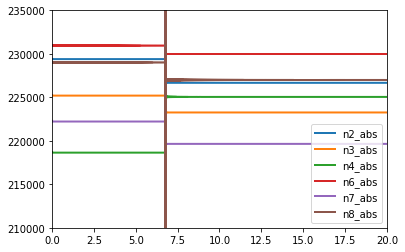

In [184]:
plot_timeseries(2, phasors_ctrl['n2']['abs'])
plot_timeseries(2, phasors_ctrl['n3']['abs'])
plot_timeseries(2, phasors_ctrl['n4']['abs'])
plot_timeseries(2, phasors_ctrl['n6']['abs'])
plot_timeseries(2, phasors_ctrl['n7']['abs'])
plot_timeseries(2, phasors_ctrl['n8']['abs'])
plt.gca().axes.set_ylim([210000,235000])
#plt.gca().axes.set_xlim([7.28,7.3])

Plot original data without controlled load.

(200000, 240000)

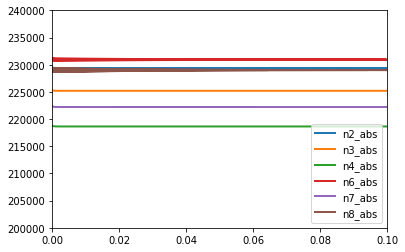

In [185]:
plot_timeseries(2, phasors_orig['n2']['abs'])
plot_timeseries(2, phasors_orig['n3']['abs'])
plot_timeseries(2, phasors_orig['n4']['abs'])
plot_timeseries(2, phasors_orig['n6']['abs'])
plot_timeseries(2, phasors_orig['n7']['abs'])
plot_timeseries(2, phasors_orig['n8']['abs'])
plt.gca().axes.set_ylim([200000,240000])